In [141]:
import sys
import copy
sys.path.append('/Users/vdk/Software/code/')
import pandas as pd
from astropy.table import Table, vstack
from ctapipe.io import EventSource
import glob
from python_modules.muonpipe import usefull_func
from datetime import datetime
import pandas as pd
import glob
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
colors = [
    '#1f77b4',  # muted blue
    '#ff7f0e',  # safety orange
    '#2ca02c',  # cooked asparagus green
    '#d62728',  # brick red
    '#9467bd',  # muted purple
    '#e377c2',  # raspberry yogurt pink
    '#8c564b',  # chestnut brown
    'k'
]

start_date_2019 = datetime.strptime("2019-11-25 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()

start_date_2020 = datetime.strptime("2020-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2020 = datetime.strptime("2020-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()

start_date_2021 = datetime.strptime("2021-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2021 = datetime.strptime("2021-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()

start_date_2022 = datetime.strptime("2022-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2022 = datetime.strptime("2022-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()

start_date_2023 = datetime.strptime("2023-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2023 = datetime.strptime("2023-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()

start_date_2024 = datetime.strptime("2024-01-01 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
end_date_2024 = datetime.strptime("2024-12-31 00:00:00.0", "%Y-%m-%d %H:%M:%S.%f").timestamp()
filename = '/Users/vdk/muons2024/data/for_comparison/nsb_tuning/triple_tuning/run101_muon.simtel.gz'
source = EventSource(filename, max_events = 1)
camgeom = source.subarray.tel[1].camera.geometry

import matplotlib.style as mplstyle

mplstyle.use('test_style.mplstyle')


In [4]:
muon_files = glob.glob('/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/*')
print(sorted(muon_files))

df_files = [pd.read_csv(muon_file, na_values=['NA', '?']) for muon_file in sorted(muon_files)] 
df_all_data = pd.concat(df_files, ignore_index=True)
df_good_data_real = df_all_data[(df_all_data['muon_efficiency'] < muon_efficiency_cut) & (df_all_data['size_outside'] < size_outside_cut)]
del(df_all_data)
df_good_data_real

['/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/1_0-25k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/2_25-50k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/3_50-75k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/4_75-100k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/5_100-125k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/6_125-150k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/7_150-175k_lowNSBmuons.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/8_0-600fits_lowNSB.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/91_1200-1800fits_lowNSB.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/92_v010_1stHalf_lowNSB.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/93_v010_2ndHalf_lowNSB.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter/94_600-1200fits_lowNSB.csv', '/Users/vdk/muons2024/all_muon_fits/low_nsb_filter

/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_43040/2880875785.py:4: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_files = [pd.read_csv(muon_file, na_values=['NA', '?']) for muon_file in sorted(muon_files)]
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_43040/2880875785.py:4: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_files = [pd.read_csv(muon_file, na_values=['NA', '?']) for muon_file in sorted(muon_files)]
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_43040/2880875785.py:4: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_files = [pd.read_csv(muon_file, na_values=['NA', '?']) for muon_file in sorted(muon_files)]
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_43040/2880875785.py:4: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set

,event_id,event_time,mc_energy,ring_size,size_outside,ring_center_x,ring_center_y,ring_radius,ring_width,good_ring,...,impact_parameter,impact_x_array,impact_y_array,radial_stdev,radial_skewness,radial_excess_kurtosis,num_pixels_in_ring,mean_pixel_charge_around_ring,hg_peak_sample,lg_peak_sample
0,60.0,1.574637e+09,-1.0,2311.1147,0.000000,-0.975512,-0.354570,1.038939,0.066076,1.0,...,6.481509,6.331281,1.387386,0.059634,-0.111103,0.311915,371.0,0.039351,13.0,0.0
1,287.0,1.574637e+09,-1.0,2646.7896,0.000000,0.353987,0.463572,1.192394,0.039972,1.0,...,6.638931,0.768292,6.594326,0.042449,0.208130,0.457135,493.0,0.104818,15.0,0.0
2,815.0,1.574637e+09,-1.0,2682.9595,0.000000,0.200454,0.503540,1.155244,0.050399,1.0,...,5.826689,5.821747,-0.239914,0.049087,0.312026,0.410487,478.0,0.048045,17.0,0.0
3,1248.0,1.574637e+09,-1.0,2802.3580,0.000000,0.719930,0.076793,1.203815,0.034111,1.0,...,4.560473,1.679653,4.239891,0.038754,0.229592,0.123887,499.0,0.371614,19.0,0.0
4,1573.0,1.574637e+09,-1.0,2121.7700,0.000000,-0.878445,0.215899,1.024937,0.093730,1.0,...,8.680637,-3.656715,-7.872858,0.077182,-0.073894,0.545917,358.0,0.000755,14.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31308385,4843910.0,1.719445e+09,-1.0,1624.1024,8.637733,-0.659971,0.876965,0.848291,0.116848,1.0,...,9.798134,-9.516054,2.334126,0.095898,-0.030282,-0.441889,251.0,0.703649,17.0,0.0
31308386,4849315.0,1.719445e+09,-1.0,2414.9480,0.000000,-0.454369,-0.084192,1.216073,0.040280,1.0,...,7.001510,-5.435892,4.412734,0.042521,0.049803,0.318690,509.0,0.236881,15.0,0.0
31308387,4849722.0,1.719445e+09,-1.0,1970.0897,0.000000,0.253036,0.191820,1.140060,0.090437,1.0,...,9.286253,-0.358254,9.279340,0.067051,-0.067978,-0.366449,449.0,0.183407,18.0,0.0
31308388,4850938.0,1.719445e+09,-1.0,1704.5847,0.000000,0.259656,1.009226,0.828704,0.082265,1.0,...,3.947441,3.907940,-0.557041,0.068710,0.337672,-0.121390,235.0,0.282522,18.0,0.0


In [5]:
size_outside_cut = 500
muon_efficiency_cut = 1
min_impact = 2.2199933748101555
max_impact = 9.983608702234397

In [6]:
listdir = glob.glob('/Users/vdk/muons2024/lapalma_simulations/nsb_play/grand_tune/2020/tables/*')
listdir = glob.glob('/Users/vdk/muons2024/lapalma_simulations/nsb_play/grand_tune/2021/tables/*')
# listdir = glob.glob('/Users/vdk/muons2024/lapalma_simulations/nsb_play/grand_tune/2023/tables/*')
listdir= glob.glob('/Users/vdk/muons2024/lapalma_simulations/nsb_play/nsb_tune_2024_year_no_outliers/tables/*')

#listdir = glob.glob('/Users/vdk/muons2024/lapalma_simulations/proper_mc_config/nsbtune2020year_tuned_reflectivity/tables/*')
#listdir = glob.glob('/Users/vdk/muons2024/lapalma_simulations/proper_mc_config/nsbtune2021year_tuned_reflectivity/tables/*')
#listdir = glob.glob('/Users/vdk/muons2024/lapalma_simulations/proper_mc_config/nsbtune2023year_tuned_reflectivity/tables/*')
listdir = glob.glob('/Users/vdk/muons2024/lapalma_simulations/proper_mc_config/nsbtune2024year_tuned_reflectivity/tables/*')

dat = Table.read('{}'.format(listdir[0]), format='fits')

for muon_file in listdir:
    dat2 = Table.read(muon_file, format='fits')
    dat = vstack([dat, dat2])

df = dat.to_pandas()
df_sim_2024_tune = df[df['good_ring'] & (df['muon_efficiency'] < muon_efficiency_cut) & (df['size_outside'] < size_outside_cut)]
df_sim_2024_tune

,event_id,event_time,mc_energy,ring_size,size_outside,ring_center_x,ring_center_y,ring_radius,ring_width,good_ring,...,impact_parameter,impact_x_array,impact_y_array,radial_stdev,radial_skewness,radial_excess_kurtosis,num_pixels_in_ring,mean_pixel_charge_around_ring,hg_peak_sample,lg_peak_sample
0,100,NaN,0.023803,2501.871338,0.0,-0.214498,-0.782758,1.198219,0.040690,True,...,5.183425,-3.329351,-3.972823,0.041452,0.493347,-0.372735,489,-0.029766,NaN,NaN
1,101,NaN,0.023803,2504.850586,0.0,-0.211201,-0.776545,1.186740,0.033321,True,...,3.280628,-3.227235,-0.589466,0.041010,0.347271,-0.586739,482,0.068721,NaN,NaN
2,102,NaN,0.023803,2040.053833,0.0,-0.232049,-0.788526,1.220426,0.035211,True,...,8.778308,7.926207,-3.772789,0.039787,0.210744,-0.735107,507,0.133870,NaN,NaN
3,103,NaN,0.023803,2712.278564,0.0,-0.235484,-0.768943,1.194841,0.023702,True,...,4.578258,3.303239,3.170025,0.034369,0.220551,0.393131,491,-0.057473,NaN,NaN
4,104,NaN,0.023803,2525.781250,0.0,-0.226769,-0.774547,1.184794,0.041925,True,...,6.518219,-1.078635,6.428353,0.043871,0.336848,0.135584,484,-0.016202,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386795,532602,NaN,0.015264,2621.745361,0.0,-0.456607,-0.843046,1.140756,0.033198,True,...,3.957790,-1.736350,3.556570,0.037565,0.239338,0.061160,439,-0.005949,NaN,NaN
386796,532603,NaN,0.015264,2421.743652,0.0,-0.473171,-0.846846,1.148252,0.048502,True,...,5.298855,5.263330,0.612552,0.049796,0.372941,-0.191834,438,0.038985,NaN,NaN
386797,532604,NaN,0.015264,2196.527100,0.0,-0.476618,-0.846767,1.160507,0.050584,True,...,7.192300,7.138916,-0.874673,0.051545,0.180497,-0.348355,447,-0.038492,NaN,NaN
386798,532700,NaN,0.032855,2658.559082,0.0,-0.395674,0.442068,1.208405,0.034074,True,...,2.263907,-0.249364,2.250132,0.039068,0.024092,-0.326522,503,0.012935,NaN,NaN


In [7]:
ring_containment_cut = 0.3
ring_completeness_cut = 0.99
min_radius_cut = 0.95
max_radius_cut = 1.15


df_real_data_cut_2020 = df_good_data_real[ 
    (df_good_data_real['ring_completeness'] > ring_completeness_cut) &
    (df_good_data_real['ring_containment'] > ring_containment_cut) &
    (df_good_data_real['ring_radius'] > min_radius_cut) &  
    (df_good_data_real['ring_radius'] < max_radius_cut) &  
    (df_good_data_real['event_time'] > start_date_2020) &
    (df_good_data_real['event_time'] < end_date_2020)
]

# df_real_data_cut = df_good_data_real[ 
#     (df_good_data_real['ring_completeness'] > ring_completeness_cut) &
#     (df_good_data_real['ring_containment'] > ring_containment_cut) &
#     (df_good_data_real['ring_radius'] > min_radius_cut) &  
#     (df_good_data_real['ring_radius'] < max_radius_cut) &  
#     (df_good_data_real['event_time'] > start_date_2022) &
#     (df_good_data_real['event_time'] < end_date_2022)
# ]

df_real_data_cut_2021 = df_good_data_real[ 
    (df_good_data_real['ring_completeness'] > ring_completeness_cut) &
    (df_good_data_real['ring_containment'] > ring_containment_cut) &
    (df_good_data_real['ring_radius'] > min_radius_cut) &  
    (df_good_data_real['ring_radius'] < max_radius_cut) &  
    (df_good_data_real['event_time'] > start_date_2021) &
    (df_good_data_real['event_time'] < end_date_2021)
]

df_real_data_cut_2022 = df_good_data_real[ 
    (df_good_data_real['ring_completeness'] > ring_completeness_cut) &
    (df_good_data_real['ring_containment'] > ring_containment_cut) &
    (df_good_data_real['ring_radius'] > min_radius_cut) &  
    (df_good_data_real['ring_radius'] < max_radius_cut) &  
    (df_good_data_real['event_time'] > start_date_2022) &
    (df_good_data_real['event_time'] < end_date_2022)
]

df_real_data_cut_2023 = df_good_data_real[ 
    (df_good_data_real['ring_completeness'] > ring_completeness_cut) &
    (df_good_data_real['ring_containment'] > ring_containment_cut) &
    (df_good_data_real['ring_radius'] > min_radius_cut) &  
    (df_good_data_real['ring_radius'] < max_radius_cut) &  
    (df_good_data_real['event_time'] > start_date_2023) &
    (df_good_data_real['event_time'] < end_date_2023)
]

df_real_data_cut_2024 = df_good_data_real[ 
    (df_good_data_real['ring_completeness'] > ring_completeness_cut) &
    (df_good_data_real['ring_containment'] > ring_containment_cut) &
    (df_good_data_real['ring_radius'] > min_radius_cut) &  
    (df_good_data_real['ring_radius'] < max_radius_cut) &  
    (df_good_data_real['event_time'] > start_date_2024) &
    (df_good_data_real['event_time'] < end_date_2024)
]

# df_sim_cut_nsbtune = df_sim_data_global_integration_cor_nsbtune[
#     (df_sim_data_global_integration_cor_nsbtune['ring_radius'] > min_radius_cut) & 
#     (df_sim_data_global_integration_cor_nsbtune['ring_radius'] < max_radius_cut) &
#     (df_sim_data_global_integration_cor_nsbtune['ring_completeness'] > ring_completeness_cut) & 
#     (df_sim_data_global_integration_cor_nsbtune['ring_containment'] > ring_containment_cut) 
# ]

# df_sim_cut = df_sim_zenith10[
#     (df_sim_zenith10['ring_radius'] > min_radius_cut) & 
#     (df_sim_zenith10['ring_radius'] < max_radius_cut) &
#     (df_sim_zenith10['ring_completeness'] > ring_completeness_cut) & 
#     (df_sim_zenith10['ring_containment'] > ring_containment_cut) 
# ]

df_sim_cut_2024_tune = df_sim_2024_tune[
    (df_sim_2024_tune['ring_radius'] > min_radius_cut) & 
    (df_sim_2024_tune['ring_radius'] < max_radius_cut) &
    (df_sim_2024_tune['ring_completeness'] > ring_completeness_cut) & 
    (df_sim_2024_tune['ring_containment'] > ring_containment_cut) 
]





#print(f"Size of the sim dataset {len(df_sim_cut)}")
print(f"Size of the sim 2024 tune dataset {len(df_sim_cut_2024_tune)}")
#print(f"Size of the obs dataset {len(df_real_data_cut)}")



Size of the sim 2024 tune dataset 567


/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_43040/3956531605.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mc['binned_radius'] = pd.cut(data_mc['ring_radius'], bins, include_lowest=True, labels=False)
/var/folders/_p/3fmt5jz5231_9gxtm8xt76p00000gn/T/ipykernel_43040/3956531605.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_run['binned_radius'] = pd.cut(data_run['ring_radius'], bins, include_lowest=True, labels=False)


(1800.0, 3000.0)

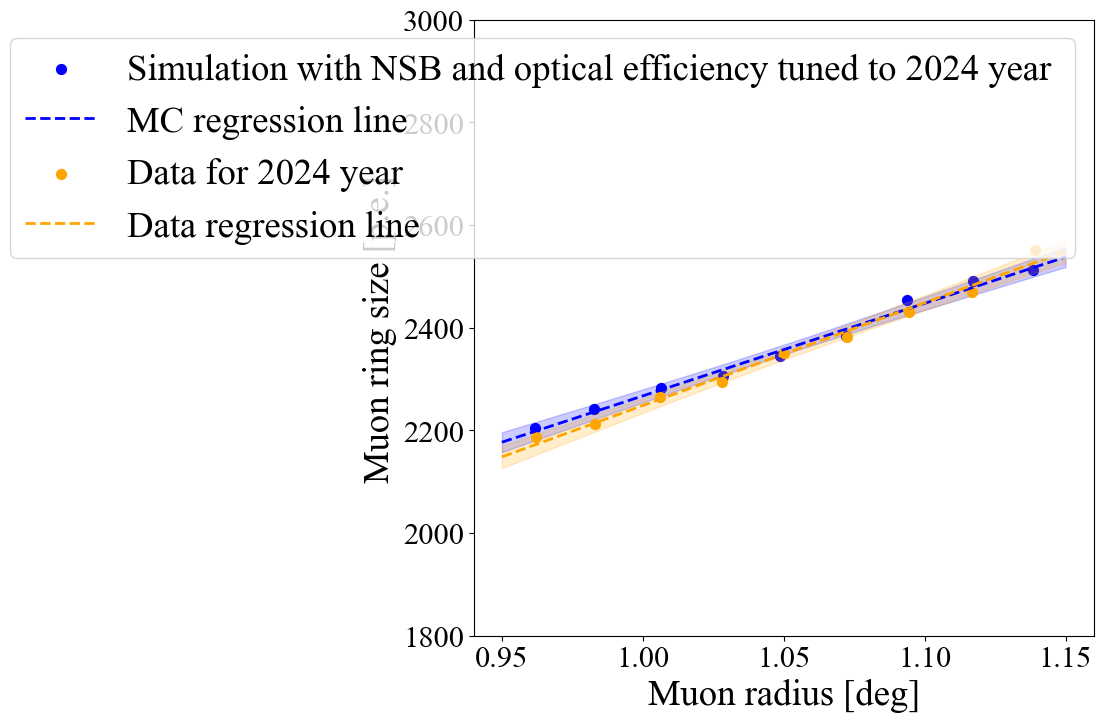

In [74]:
year_value = 2024
data_mc = df_sim_cut_2024_tune
# data_mc = df_sim_data_global_integration_cor_nsbtune[
#     (df_sim_data_global_integration_cor_nsbtune['ring_radius'] > min_radius_cut) & 
#     (df_sim_data_global_integration_cor_nsbtune['ring_radius'] < max_radius_cut) &
#     (df_sim_data_global_integration_cor_nsbtune['ring_completeness'] > ring_completeness_cut) & 
#     (df_sim_data_global_integration_cor_nsbtune['ring_containment'] > ring_containment_cut) 
# ]
data_run = eval(f"df_real_data_cut_{year_value}")
#data_run = df_real_data_stacked

# Define the bins
bins = np.linspace(min_radius_cut, max_radius_cut, 10)
# Generate x values for the regression lines
x_values = np.linspace(bins.min(), bins.max(), 300)
x_values_with_const = sm.add_constant(x_values)


# Bin the data for MC
data_mc['binned_radius'] = pd.cut(data_mc['ring_radius'], bins, include_lowest=True, labels=False)
binned_mc = data_mc.groupby('binned_radius').agg({
    'ring_radius': 'mean',
    'ring_size': 'mean'
})
binned_mc['ring_size'] = binned_mc['ring_size']
binned_mc['constant'] = 1
model_mc = sm.OLS(binned_mc['ring_size'], binned_mc[['constant', 'ring_radius']]).fit()
y_values_mc = model_mc.predict(x_values_with_const)
prediction_mc = model_mc.get_prediction(x_values_with_const)
conf_int_mc = prediction_mc.conf_int()


# # Bin the data for MC
# df_real_data_cut_2021['binned_radius'] = pd.cut(df_real_data_cut_2021['ring_radius'], bins, include_lowest=True, labels=False)
# binned_data_2021 = df_real_data_cut_2021.groupby('binned_radius').agg({
#     'ring_radius': 'mean',
#     'ring_size': 'mean'
# })
# binned_data_2021['ring_size'] = binned_data_2021['ring_size']
# binned_data_2021['constant'] = 1
# model_data_2021 = sm.OLS(binned_data_2021['ring_size'], binned_data_2021[['constant', 'ring_radius']]).fit()
# # Generate y values and confidence intervals using the regression models
# y_values_data_2021 = model_data_2021.predict(x_values_with_const)
# prediction_data_2021 = model_data_2021.get_prediction(x_values_with_const)
# conf_int_mc_2021 = prediction_data_2021.conf_int()


# Bin the data for Run
data_run['binned_radius'] = pd.cut(data_run['ring_radius'], bins, include_lowest=True, labels=False)
binned_run = data_run.groupby('binned_radius').agg({
    'ring_radius': 'mean',
    'ring_size': 'mean'
})
binned_run['constant'] = 1
model_run = sm.OLS(binned_run['ring_size'], binned_run[['constant', 'ring_radius']]).fit()
y_values_run = model_run.predict(x_values_with_const)
prediction_run = model_run.get_prediction(x_values_with_const)
conf_int_run = prediction_run.conf_int()


# Plotting
plt.figure(figsize=(8, 8))

# Plotting MC data
plt.scatter(binned_mc['ring_radius'], binned_mc['ring_size'], color='blue', label='Simulation with NSB and optical efficiency tuned to 2024 year ', s=50)
plt.plot(x_values, y_values_mc, color='blue', linestyle='--', label='MC regression line')
plt.fill_between(x_values, conf_int_mc[:, 0], conf_int_mc[:, 1], color='blue', alpha=0.2)

# plt.scatter(binned_data_2021['ring_radius'], binned_data_2021['ring_size'], color='blue', label='Simulation with tuned NSB to Run17043 (0.31 GHz)', s=50)
# plt.plot(x_values, y_values_data_2021, color='blue', linestyle='--', label='MC regression line')
# plt.fill_between(x_values, conf_int_data_2021[:, 0], conf_int_data_2021[:, 1], color='', alpha=0.2)

# Plotting Data Run
plt.scatter(binned_run['ring_radius'], binned_run['ring_size'], color='orange', label=f'Data for {year_value} year', s=50)

plt.plot(x_values, y_values_run, color='orange', linestyle='--', label='Data regression line')
plt.fill_between(x_values, conf_int_run[:, 0], conf_int_run[:, 1], color='orange', alpha=0.2)


# Adding labels and legend
plt.xlabel('Muon radius [deg]')
plt.ylabel('Muon ring size [p.e.]')
plt.legend()
plt.ylim(1800,3000)
#plt.grid(alpha=0.5)
#plt.title(f"Quality cuts containment > {ring_containment_cut} completeness > {ring_completeness_cut}")
#plt.show()
#plt.savefig(f'/Users/vdk/muons2024/images/PlanPaper/cuts_investigation/2022tune_size_vs_radius_{year_value}year_cont{ring_containment_cut}_comp{ring_completeness_cut}.pdf', dpi=200, format='pdf', bbox_inches='tight')
#plt.savefig(f'/Users/vdk/muons2024/images/AA_paper/2024tune_size_vs_radius_{year_value}year_cont{ring_containment_cut}_comp{ring_completeness_cut}.pdf', dpi=200, format='pdf', bbox_inches='tight')

In [83]:
from scipy.stats import chisquare

# Example data for simulation and observational datasets
simulation_data = binned_mc['ring_size']
observational_data = binned_run['ring_size']

# Create bins (this is just an example, bin according to your data range)
bins = np.linspace(min(observational_data), max(observational_data), 9)

# Digitize data into bins
sim_bin_counts, _ = np.histogram(simulation_data, bins)
obs_bin_counts, _ = np.histogram(observational_data, bins)

# Perform the chi-squared test
chi2_statistic, p_value = chisquare(f_obs=obs_bin_counts, f_exp=sim_bin_counts)

print(f'Chi-Squared Statistic: {chi2_statistic}')
print(f'p-value: {p_value}')

Chi-Squared Statistic: 1.5
p-value: 0.9823096598068504


,ring_radius,ring_size,constant
binned_radius,,,
0,0.961839,2204.655518,1
1,0.982607,2241.424805,1
2,1.006611,2282.104980,1
3,1.028461,2305.062256,1
4,1.048783,2344.067139,1
5,1.072146,2383.140869,1
6,1.093780,2453.422607,1
7,1.117074,2490.066406,1
8,1.138443,2511.591064,1


In [138]:
import numpy as np
from scipy.stats import chisquare

# Example data for simulation and observational datasets
simulation_data = binned_mc['ring_size']
observational_data = binned_run['ring_size']

simulation_data = np.array(list(data_mc['ring_radius'][:567]))
observational_data = np.array(list(data_run['ring_radius'][:567]))

# Create bins (this is just an example, bin according to your data range)
bins = np.linspace(0.95, 1.15, 8)  # Adjust bin edges based on your data

# Digitize data into bins
sim_bin_counts, _ = np.histogram(simulation_data, bins)
obs_bin_counts, _ = np.histogram(observational_data, bins)

# Check for zero frequencies and add a small value if necessary
sim_bin_counts = np.where(sim_bin_counts == 0, 1e-10, sim_bin_counts)
obs_bin_counts = np.where(obs_bin_counts == 0, 1e-10, obs_bin_counts)

# Perform the chi-squared test
chi2_statistic, p_value = chisquare(f_obs=obs_bin_counts, f_exp=sim_bin_counts)

print(f'Chi-Squared Statistic: {chi2_statistic}')
print(f'p-value: {p_value}')

Chi-Squared Statistic: 18.541070740785266
p-value: 0.005013160216323672


In [130]:
sim_bin_counts

array([1.e-10, 1.e-10, 1.e-10, 1.e-10, 1.e-10, 1.e-10, 1.e-10])

In [118]:
simulation_data = np.array(list(data_mc['ring_size']))
observational_data = np.array(list(data_run['ring_size'][:567]))

# Create bins (this is just an example, bin according to your data range)
bins = np.linspace(1000, 5000, 9)  # Adjust bin edges based on your data

# Digitize data into bins
sim_bin_counts, _ = np.histogram(simulation_data, bins)
obs_bin_counts, _ = np.histogram(observational_data, bins)
# Check for zero frequencies and add a small value if necessary
sim_bin_counts = np.where(sim_bin_counts == 0, 1e-10, sim_bin_counts)
obs_bin_counts = np.where(obs_bin_counts == 0, 1e-10, obs_bin_counts)
chi2_statistic, p_value = chisquare(f_obs=obs_bin_counts, f_exp=sim_bin_counts)

print(f'Chi-Squared Statistic: {chi2_statistic}')
print(f'p-value: {p_value}')

Chi-Squared Statistic: 90000000091.23714
p-value: 0.0


In [116]:
obs_bin_counts

array([  0,   6, 446, 102,  10,   0,   3,   0])

In [117]:
sim_bin_counts

array([  0,   2, 430, 134,   1,   0,   0,   0])

In [153]:
new_data_run = copy.deepcopy(data_run)
new_data_run = new_data_run[new_data_run['ring_size'] < 2800]

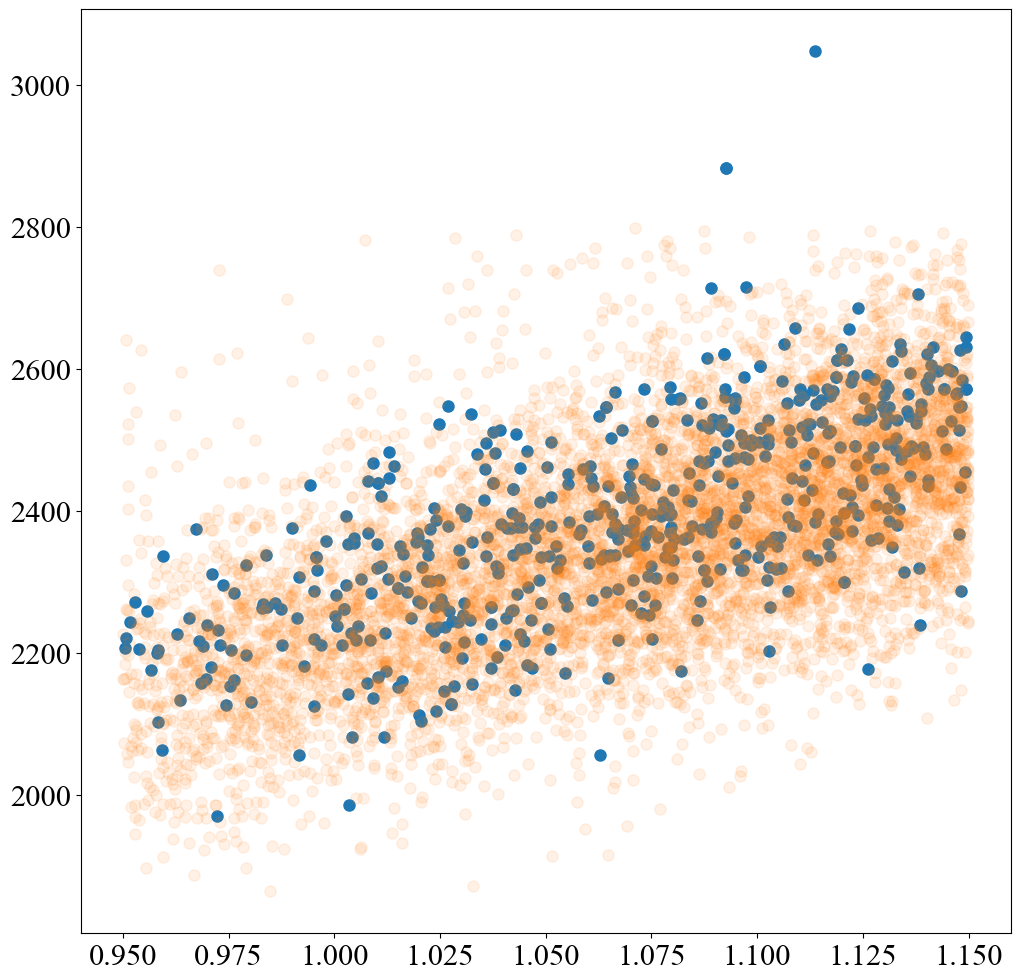

In [154]:
plt.scatter(data_mc['ring_radius'],data_mc['ring_size'])
plt.scatter(new_data_run['ring_radius'],new_data_run['ring_size'], alpha = 0.1)

In [160]:
simulation_data = data_mc['ring_size']
observational_data = new_data_run['ring_size'][:567]

# Create bins (this is just an example, bin according to your data range)
bins = np.linspace(1800, 3200, 9)  # Adjust bin edges based on your data

# Digitize data into bins
sim_bin_counts, _ = np.histogram(simulation_data, bins)
obs_bin_counts, _ = np.histogram(observational_data, bins)
# Check for zero frequencies and add a small value if necessary
sim_bin_counts = np.where(sim_bin_counts == 0, 1e-10, sim_bin_counts)
obs_bin_counts = np.where(obs_bin_counts == 0, 1e-10, obs_bin_counts)
chi2_statistic, p_value = chisquare(f_obs=obs_bin_counts, f_exp=sim_bin_counts)

print(f'Chi-Squared Statistic: {chi2_statistic}')
print(f'p-value: {p_value}')

Chi-Squared Statistic: 130.13120630630831
p-value: 5.900887720683751e-25


In [161]:
sim_bin_counts

array([  1.,  20., 162., 249., 128.,   4.,   2.,   1.])

In [162]:
obs_bin_counts

array([5.00e+00, 4.70e+01, 1.70e+02, 2.46e+02, 8.00e+01, 1.90e+01,
       1.00e-10, 1.00e-10])

In [164]:
import numpy as np
import statsmodels.api as sm

# Assume data_x, data_y, sim_x, sim_y are your observational and simulation data
# Fit regression lines
obs_slope, obs_intercept = np.polyfit(data_run['ring_radius'], data_run['ring_size'], 1)
sim_slope, sim_intercept = np.polyfit(data_mc['ring_radius'],data_mc['ring_size'], 1)

data_x = data_run['ring_radius']   
data_y = data_run['ring_size']  
sim_x = data_mc['ring_radius'] 
sim_y = data_mc['ring_size']

# Calculate standard errors and confidence intervals for each parameter
X_obs = sm.add_constant(data_x)
model_obs = sm.OLS(data_y, X_obs).fit()

X_sim = sm.add_constant(sim_x)
model_sim = sm.OLS(sim_y, X_sim).fit()

obs_ci = model_obs.conf_int()
sim_ci = model_sim.conf_int()

print(f'Observational Slope: {obs_slope}, CI: {obs_ci[1]}')
print(f'Simulation Slope: {sim_slope}, CI: {sim_ci[1]}')
print(f'Observational Intercept: {obs_intercept}, CI: {obs_ci[0]}')
print(f'Simulation Intercept: {sim_intercept}, CI: {sim_ci[0]}')

Observational Slope: 2044.0034440991346, CI: const           309.060323
ring_radius    2144.951322
Name: 1, dtype: float64
Simulation Slope: 1846.4370853100781, CI: const           600.180516
ring_radius    2017.560312
Name: 1, dtype: float64
Observational Intercept: 200.90639802366132, CI: const            92.752473
ring_radius    1943.055566
Name: 0, dtype: float64
Simulation Intercept: 417.18103818278473, CI: const           234.181560
ring_radius    1675.313858
Name: 0, dtype: float64


In [166]:
model_sim.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ring_size   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     449.2
Date:                Sun, 11 Aug 2024   Prob (F-statistic):           8.49e-74
Time:                        07:03:10   Log-Likelihood:                -3441.2
No. Observations:                 567   AIC:                             6886.
Df Residuals:                     565   BIC:                             6895.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         417.1810     93.169      4.478      0.000     234.182     600.181
ring_radius  1846.4371     87.122     21.194      0.000    1675.314    2017.560
==============================================================================
Omnibus:                       43.580   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.385
Skew:                           0.352   Prob(JB):                     4.38e-27
Kurtosis:                       5.155   Cond. No.                         42.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [167]:
model_obs.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ring_size   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     1575.
Date:                Sun, 11 Aug 2024   Prob (F-statistic):          1.82e-312
Time:                        07:03:43   Log-Likelihood:                -50797.
No. Observations:                7384   AIC:                         1.016e+05
Df Residuals:                    7382   BIC:                         1.016e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         200.9064     55.173      3.641      0.000      92.752     309.060
ring_radius  2044.0034     51.497     39.692      0.000    1943.056    2144.951
==============================================================================
Omnibus:                     6430.736   Durbin-Watson:                   1.640
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           217995.528
Skew:                           4.131   Prob(JB):                         0.00
Kurtosis:                      28.304   Cond. No.                         40.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""